# VISUALLIZATION

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
#from mpl_toolkits.basemap import Basemap

In [3]:
os.getcwd()

'/home/boody/NTI'

In [4]:
df_airports = pd.read_csv("Dataset/airports.csv")
df_weather = pd.read_csv("Dataset/weather.csv")
df_planes = pd.read_csv("Dataset/planes.csv")
df_flights = pd.read_csv("Dataset/flights.csv")

In [5]:
df_airports.head(3)

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893


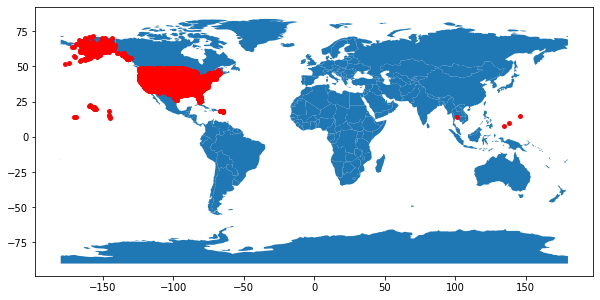

In [7]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df_airports['long'], df_airports['lat'])]
gdf = GeoDataFrame(df_airports, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [5]:
df_weather.head(3)

,date,hour,temp,dew_point,humidity,pressure,visibility,wind_dir,wind_dir2,wind_speed,gust_speed,precip,conditions,events
0,2011-01-01,0,59.0,28.9,32.0,29.86,10.0,NNE,20.0,13.8,NaN,NaN,Mostly Cloudy,NaN
1,2011-01-01,1,57.2,28.4,33.0,29.88,10.0,NNE,20.0,11.5,NaN,NaN,Mostly Cloudy,NaN
2,2011-01-01,2,55.4,28.4,36.0,29.93,10.0,NNW,340.0,12.7,NaN,NaN,Overcast,NaN


In [6]:
df_planes.head(3)

,plane,year,mfr,model,no.eng,no.seats,speed,engine,type
0,N576AA,1991.0,MCDONNELL DOUGLAS,DC-9-82(MD-82),2.0,172,NaN,Turbo-fan,Fixed wing multi engine
1,N557AA,1993.0,MARZ BARRY,KITFOX IV,1.0,2,NaN,Reciprocating,Fixed wing single engine
2,N403AA,1974.0,RAVEN,S55A,NaN,1,60.0,None,Balloon


In [7]:
df_flights.head(3)

,date,hour,minute,dep,arr,dep_delay,arr_delay,carrier,flight,dest,plane,cancelled,time,dist
0,2011-01-01 12:00:00,14.0,0.0,1400.0,1500.0,0.0,-10.0,AA,428,DFW,N576AA,0,40.0,224
1,2011-01-02 12:00:00,14.0,1.0,1401.0,1501.0,1.0,-9.0,AA,428,DFW,N557AA,0,45.0,224
2,2011-01-03 12:00:00,13.0,52.0,1352.0,1502.0,-8.0,-8.0,AA,428,DFW,N541AA,0,48.0,224


In [8]:
df_planes['no.seats'].fillna((df_planes['no.seats'].mean()), inplace=True)
df_planes['year'].fillna((df_planes['year'].mean()), inplace=True)
df_planes['speed'].fillna((df_planes['speed'].mean()), inplace=True)

In [9]:
df_airports.airport.unique

<bound method Series.unique of 0                           Thigpen 
1               Livingston Municipal
2                        Meadow Lake
3                       Perry-Warsaw
4                   Hilliard Airpark
5                  Tishomingo County
6                        Gragg-Wade 
7                            Capitol
8                  Columbiana County
9                   Memphis Memorial
10                    Calhoun County
11                  Hawley Municipal
12            Griffith-Merrillville 
13          Gatesville - City/County
14                            Eureka
15                  Moton  Municipal
16                        Schaumburg
17                   Rolla Municipal
18                  Eupora Municipal
19                          Randall 
20                   Jackpot/Hayden 
21                     Dekalb County
22              Gladewater Municipal
23                     Fitch H Beach
24            Central City Municipal
25                Wetumpka Municipal
26     

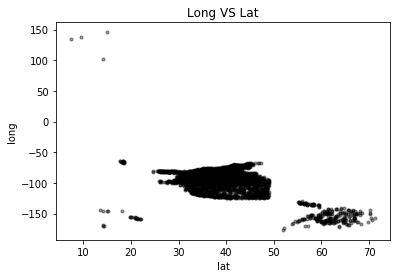

In [10]:
x = df_airports['lat']
y =  df_airports['long']
colors = (0,0,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors, alpha=0.4)
plt.title('Long VS Lat')
plt.xlabel('lat')
plt.ylabel('long')
plt.show();

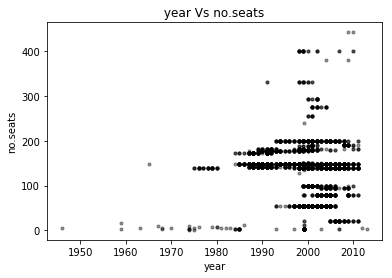

In [11]:
x =  df_planes["year"]
y = df_planes["no.seats"]
colors = (0,0,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors, alpha=0.4)
plt.title(' year Vs no.seats ')
plt.xlabel('year')
plt.ylabel('no.seats')
plt.show();

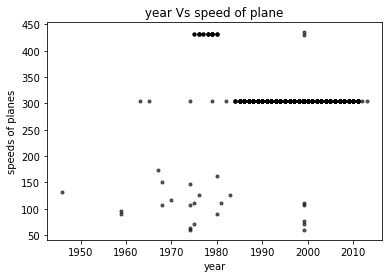

In [12]:
x =  df_planes["year"]
y = df_planes["speed"]
colors = (0,0,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors, alpha=0.6)
plt.title(' year Vs speed of plane ')
plt.xlabel('year')
plt.ylabel('speeds of planes')
plt.show();

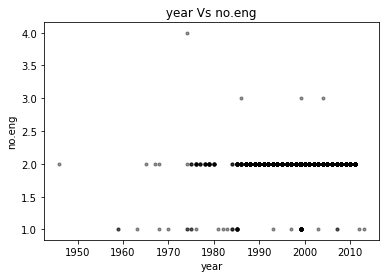

In [13]:
x =  df_planes["year"]
y = df_planes["no.eng"]
colors = (0,0,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors, alpha=0.4)
plt.title(' year Vs no.eng ')
plt.xlabel('year')
plt.ylabel('no.eng')
plt.show();

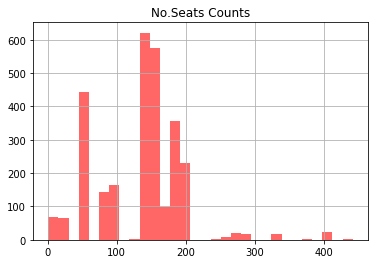

In [108]:
plt.hist(df_planes["no.seats"],bins=30 , alpha =0.6,histtype='stepfilled',color='red',edgecolor="none")
plt.grid(True)
plt.title('No.Seats Counts');

In [18]:
#plt.hist(df_planes["no.eng"],bins=20 , alpha =0.5,histtype='stepfilled',color='blue');

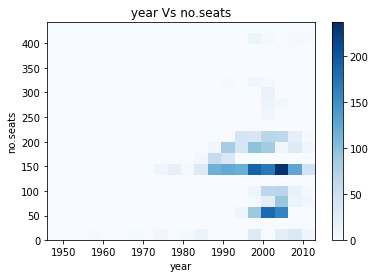

In [27]:
plt.hist2d(df_planes["year"], df_planes["no.seats"], bins=20, cmap="Blues")
plt.colorbar()
plt.title(' year Vs no.seats ')
plt.xlabel('year')
plt.ylabel('no.seats')
plt.show() 

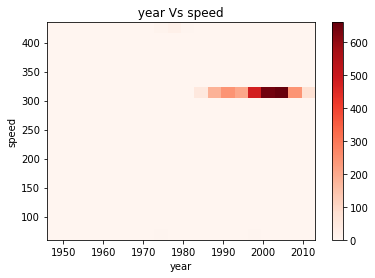

In [28]:
plt.hist2d(df_planes["year"], df_planes["speed"], bins=20, cmap="Reds")
plt.colorbar()
plt.title(' year Vs speed ')
plt.xlabel('year')
plt.ylabel('speed')
plt.show() 

Text(0.5,0,'lat')

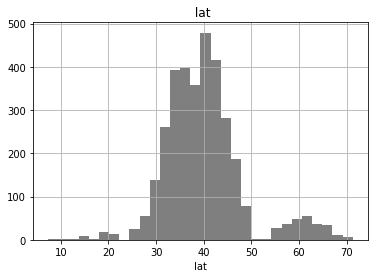

In [107]:
plt.hist(df_airports["lat"],bins=30 , alpha =0.5,histtype='stepfilled',color='black',edgecolor="none");
plt.grid(True)
plt.title(' lat')
plt.xlabel('lat')

Text(0.5,0,'long')

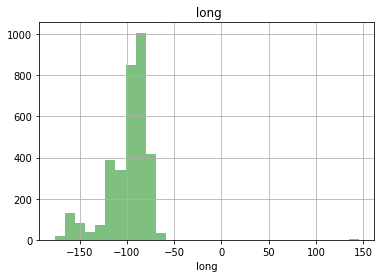

In [106]:
plt.hist(df_airports["long"],bins=30 , alpha =0.5,histtype='stepfilled',color='green',edgecolor="none");
plt.grid(True)
plt.title(' long')
plt.xlabel('long')

In [ ]:
datax = dict(df_airports['airport'].value_counts())
type(datax)
print(datax)

In [38]:
df_weather.date.isna().sum()


0

In [39]:
df_weather.pressure.isna().sum()

5

In [43]:
df_weather.pressure.fillna((df_weather.pressure.mean()), inplace=True)
df_weather.pressure.isna().sum()

0

In [40]:
df_weather.humidity.isna().sum()

5

In [44]:
df_weather.humidity.fillna((df_weather.humidity.mean()), inplace=True)
df_weather.humidity.isna().sum()

0

In [41]:
df_weather.temp.isna().sum()

5

In [45]:
df_weather.temp.fillna((df_weather.temp.mean()), inplace=True)
df_weather.temp.isna().sum()

0

In [122]:
df_weather.wind_speed.fillna((df_weather.wind_speed.mean()), inplace=True)
df_weather.wind_speed.isna().sum()

0

2011-01-01
2012-01-01


/home/boody/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


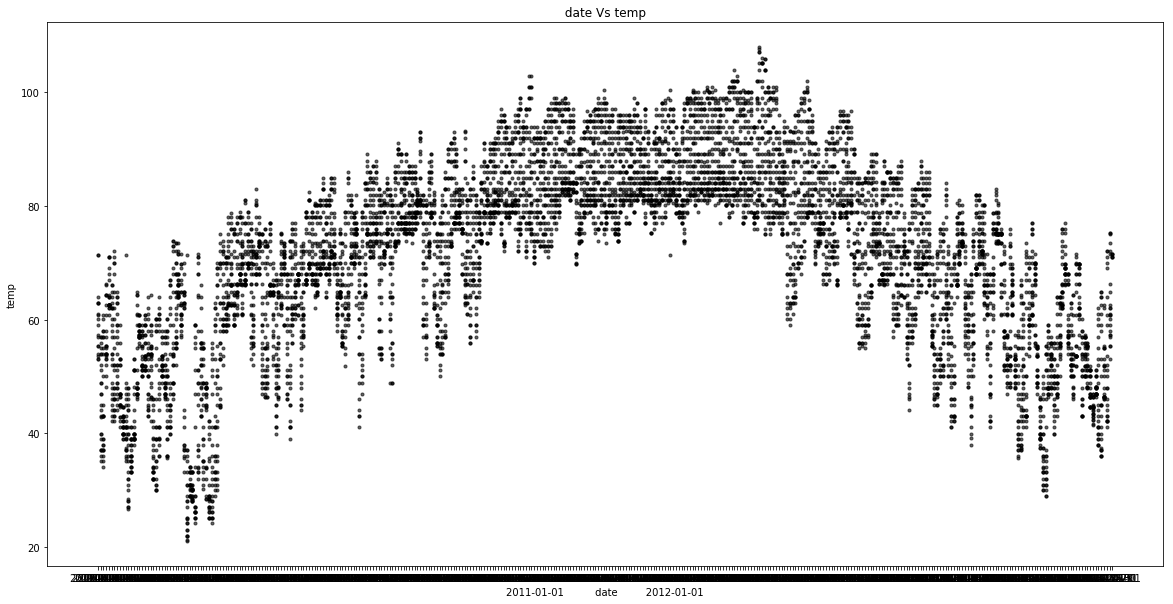

In [113]:

print(df_weather["date"][0])
last_eliment = len(df_weather["date"])
#print(last_eliment)
print(df_weather["date"][last_eliment-1])

x =  df_weather.date
y = df_weather.temp
colors = (0,0,0)
area = np.pi*3


#sc = int((last_eliment-1)/2)

plt.figure(figsize=(20,10))

#plt.xlim(df_weather["date"][0], df_weather["date"][last_eliment-1])
plt.scatter(x, y, s=area, c=colors, alpha=0.6)
plt.axes()

plt.title(' date Vs temp ')
plt.xlabel('2011-01-01          date         2012-01-01')
plt.ylabel('temp')
plt.show();

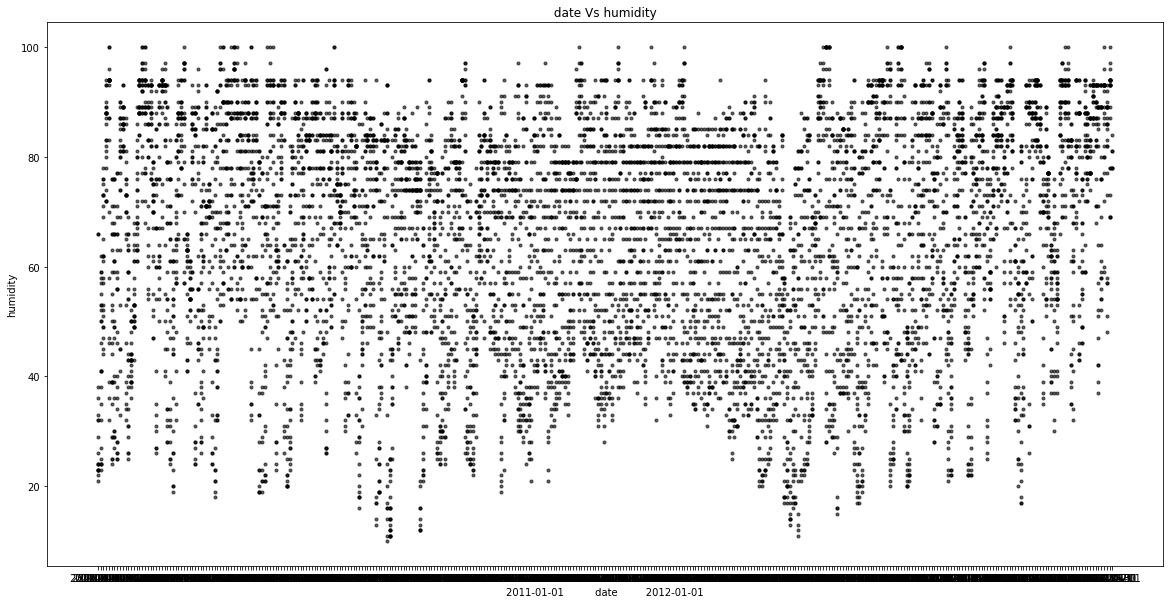

In [114]:
x =  df_weather.date
y = df_weather.humidity
colors = (0,0,0)
area = np.pi*3
plt.figure(figsize=(20,10))
plt.scatter(x, y, s=area, c=colors, alpha=0.6)
plt.title(' date Vs humidity ')
plt.xlabel('2011-01-01          date         2012-01-01')
plt.ylabel('humidity')
plt.show();

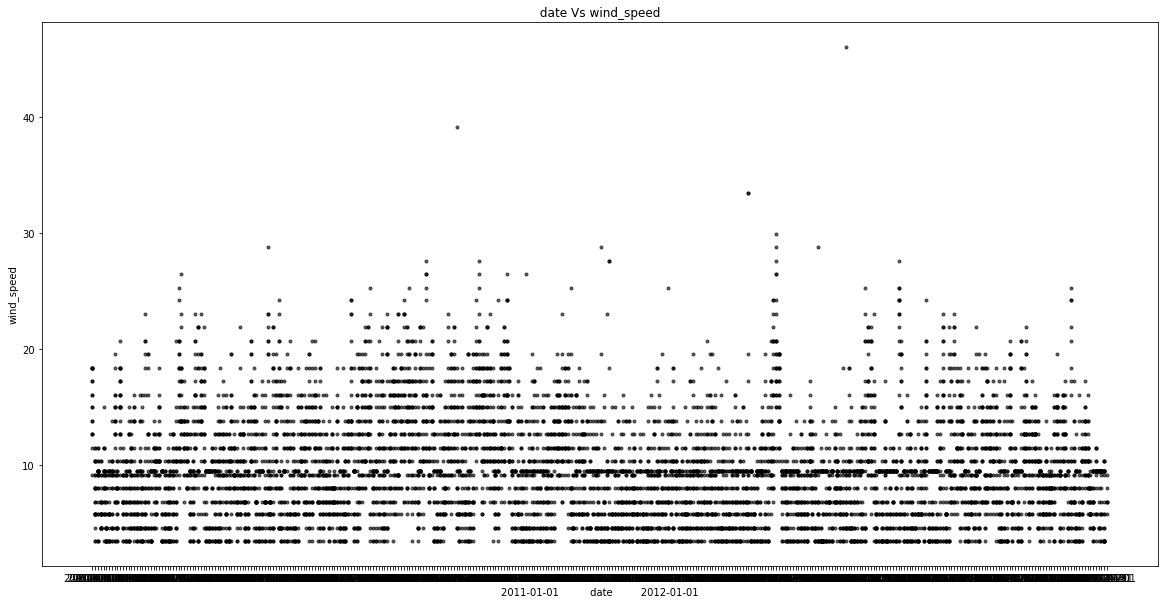

In [123]:
x =  df_weather.date
y = df_weather.wind_speed
colors = (0,0,0)
area = np.pi*3
plt.figure(figsize=(20,10))
plt.scatter(x, y, s=area, c=colors, alpha=0.6)
plt.title(' date Vs wind_speed ')
plt.xlabel('2011-01-01          date         2012-01-01')
plt.ylabel('wind_speed')
plt.show();

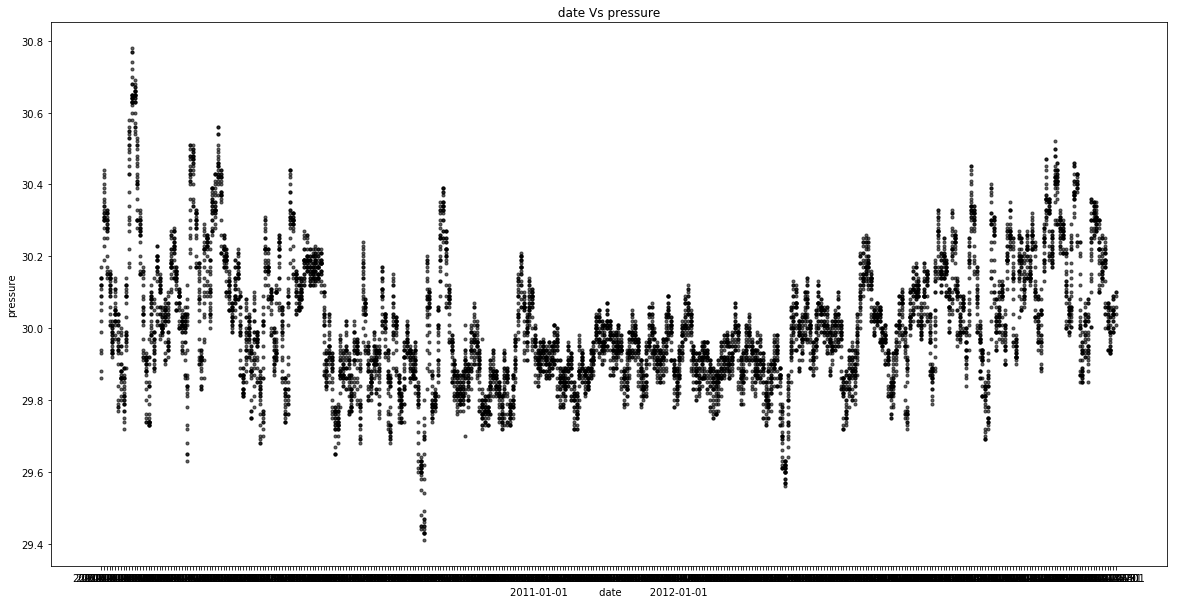

In [115]:
x =  df_weather.date
y = df_weather.pressure
colors = (0,0,0)
area = np.pi*3
plt.figure(figsize=(20,10))
plt.scatter(x, y, s=area, c=colors, alpha=0.6)
plt.title(' date Vs pressure ')
plt.xlabel('2011-01-01          date         2012-01-01')
plt.ylabel('pressure')
plt.show();

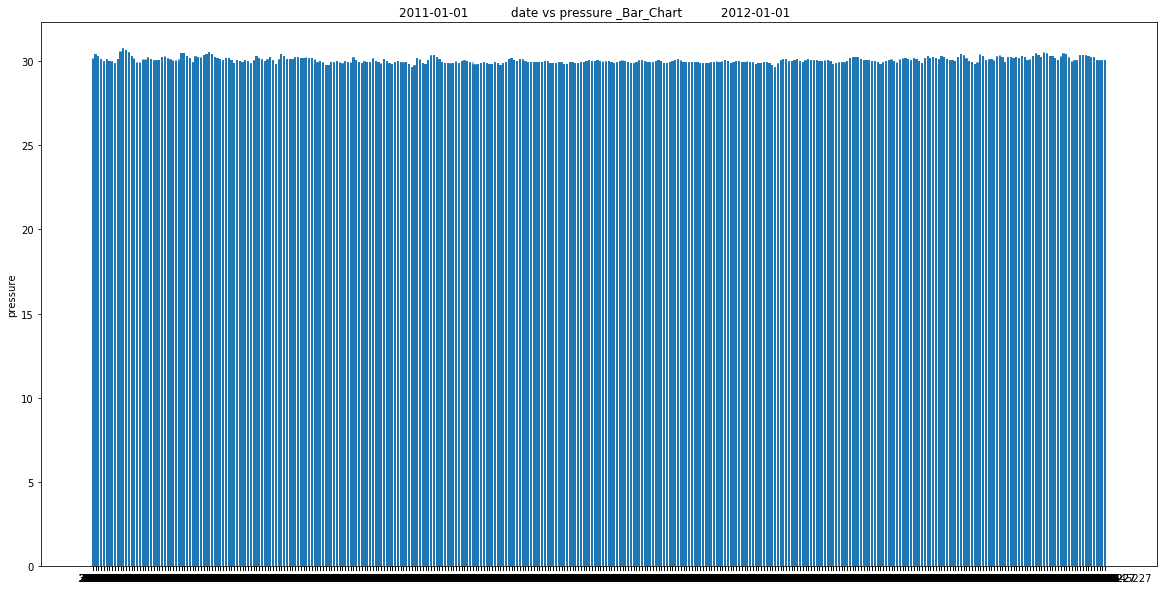

In [116]:
x =  df_weather.date
y = df_weather.pressure

plt.figure(figsize=(20,10))
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, y)
plt.ylabel('pressure')
plt.title('2011-01-01           date vs pressure _Bar_Chart          2012-01-01  ')

plt.show()

In [23]:
data_airport = dict(df_airports['airport'].value_counts())
type(data_airport)
print(data_airport)

{'Municipal': 5, 'Monroe County': 5, 'Jackson County': 5, 'Plymouth Municipal': 4, 'Franklin County': 4, 'Lancaster': 4, 'Grant County': 3, 'Mount Pleasant Municipal': 3, 'Tri-County': 3, 'Madison Municipal': 3, 'Clinton Municipal': 3, 'Carroll County': 3, 'Capital City': 3, 'Greenville Municipal': 3, 'Fayetteville Municipal': 3, 'Burlington Municipal': 3, 'Cleveland Municipal': 3, 'Cambridge Municipal': 3, 'Covington Municipal': 2, 'Bishop': 2, 'Friday Harbor': 2, 'Aurora Municipal': 2, 'Newport State': 2, 'Clark County': 2, 'Jamestown Municipal': 2, 'Centerville Municipal': 2, 'Smithville Municipal': 2, 'La Porte Municipal': 2, 'Eureka': 2, 'Mason County': 2, 'Watertown Municipal': 2, 'Hilton Head': 2, 'Litchfield Municipal': 2, 'University Park': 2, 'Portland Municipal': 2, 'Allen County': 2, 'Warsaw Municipal': 2, 'Monticello': 2, 'Frederick Municipal': 2, 'Lawrence Municipal': 2, 'Calhoun County': 2, 'Putnam County': 2, 'Shelby County': 2, 'Eunice': 2, 'Fairfield Municipal': 2, 'M

In [118]:
data_country = dict(df_airports['country'].value_counts())
type(data_country)
print(data_country)

{'USA': 3372, 'Thailand': 1, 'Federated States of Micronesia': 1, 'Palau': 1, 'N Mariana Islands': 1}


In [120]:
data_state = dict(df_airports['state'].value_counts())
type(data_state)
print(data_state)

{'AK': 263, 'TX': 209, 'CA': 205, 'OK': 102, 'OH': 100, 'FL': 100, 'GA': 97, 'NY': 97, 'MI': 94, 'MN': 89, 'IL': 88, 'WI': 84, 'IA': 78, 'KS': 78, 'MO': 74, 'AR': 74, 'AL': 73, 'NE': 73, 'MS': 72, 'NC': 72, 'MT': 71, 'PA': 71, 'TN': 70, 'WA': 65, 'IN': 65, 'AZ': 59, 'SD': 57, 'OR': 57, 'LA': 55, 'ND': 52, 'SC': 52, 'NM': 51, 'KY': 50, 'CO': 49, 'VA': 47, 'ID': 37, 'UT': 35, 'NJ': 35, 'ME': 34, 'WY': 32, 'NV': 32, 'MA': 30, 'WV': 24, 'MD': 18, 'HI': 16, 'CT': 15, 'NH': 14, 'VT': 13, 'PR': 11, 'RI': 6, 'DE': 5, 'VI': 5, 'CQ': 4, 'AS': 3, 'DC': 1, 'GU': 1}


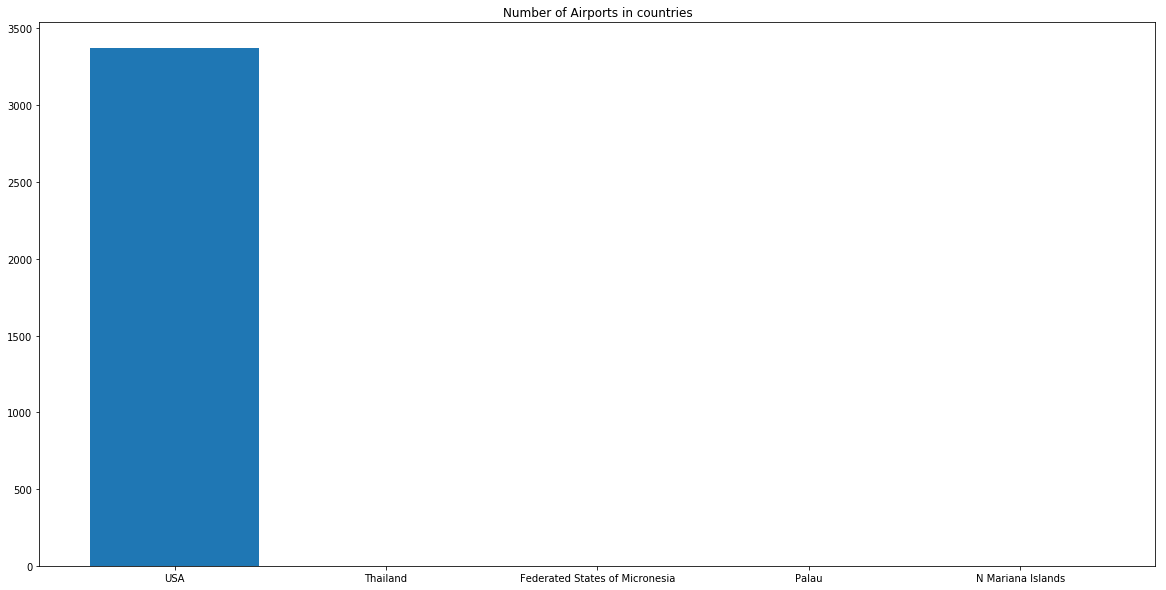

In [119]:
import matplotlib.pyplot as plt

names = list(data_country.keys())
values = list(data_country.values())
plt.figure(figsize=(20,10))
plt.bar(names, values)
plt.title('Number of Airports in countries');

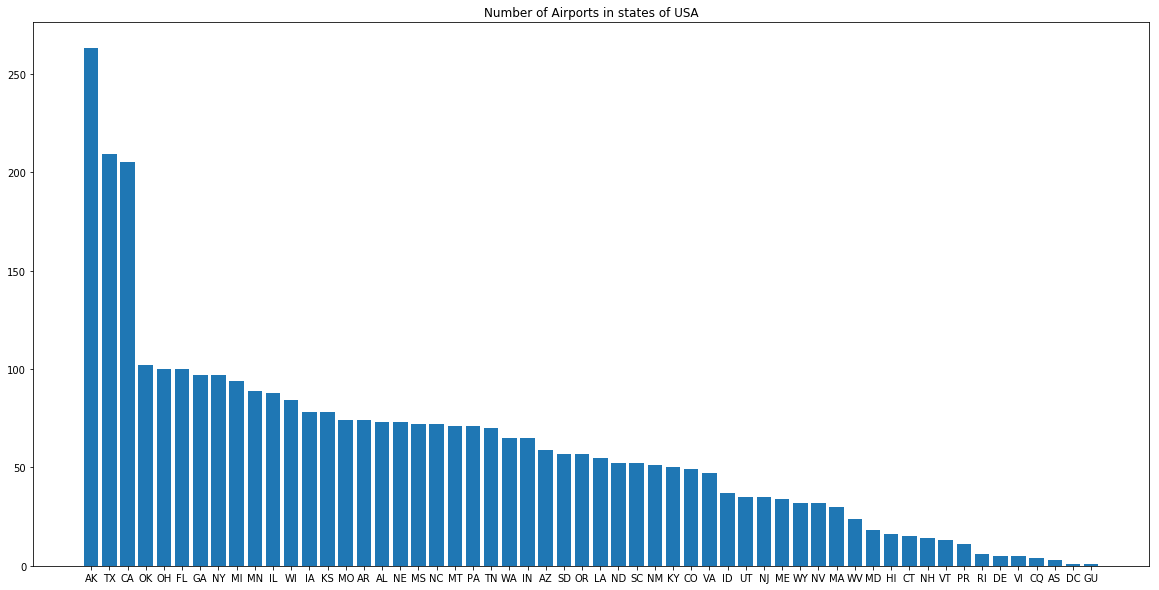

In [121]:
import matplotlib.pyplot as plt

names = list(data_state.keys())
values = list(data_state.values())
plt.figure(figsize=(20,10))
plt.bar(names, values)
plt.title('Number of Airports in states of USA');

In [128]:
data_plane_flights = dict(df_flights['plane'].value_counts())
type(data_plane_flights)
print(data_plane_flights)

{'N14945': 971, 'N15926': 960, 'N16927': 951, 'N12946': 948, 'N14937': 946, 'N14942': 946, 'N15948': 942, 'N14938': 935, 'N13935': 934, 'N14943': 934, 'N14947': 921, 'N15932': 920, 'N13936': 915, 'N14930': 913, 'N15941': 911, 'N16944': 909, 'N14939': 902, 'N14933': 897, 'N12934': 889, 'N17928': 888, 'N14925': 883, 'N13929': 874, 'N14940': 866, 'N79402': 498, 'N37409': 490, 'N75410': 486, 'N32404': 483, 'N35407': 483, 'N38403': 475, 'N37408': 472, 'N30401': 454, 'N31412': 448, 'N72405': 440, 'N73406': 429, 'N71411': 421, 'N16976': 417, 'N16919': 362, 'N21197': 362, 'N16954': 355, 'N13964': 351, 'N16151': 350, 'N13970': 347, 'N11107': 345, 'N17146': 342, 'N16642': 340, 'N24633': 338, 'N16647': 337, 'N32626': 335, 'N16646': 334, 'N13913': 333, 'N11121': 333, 'N11109': 331, 'N26141': 331, 'N56859': 331, 'N77871': 330, 'N11127': 330, 'N12921': 328, 'N19554': 327, 'N13118': 326, 'N57857': 325, 'N22971': 324, 'N14629': 323, 'N17620': 322, 'N13133': 322, 'N13949': 319, 'N13914': 319, 'N25134':

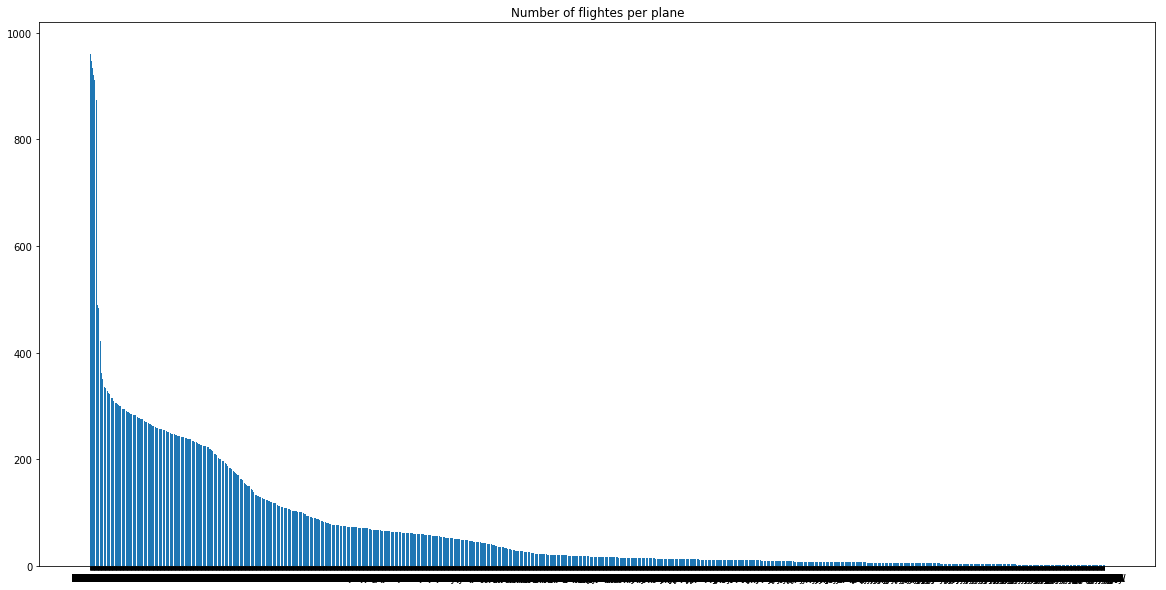

In [129]:
import matplotlib.pyplot as plt

names = list(data_plane_flights.keys())
values = list(data_plane_flights.values())
plt.figure(figsize=(20,10))
plt.bar(names, values)
plt.title('Number of flightes per plane');

In [136]:
df_flights['date'] = pd.to_datetime(df_flights['date'])
data_flights = dict(df_flights.groupby(df_flights['date'].dt.strftime('%B'))['flight'].sum().sort_values())

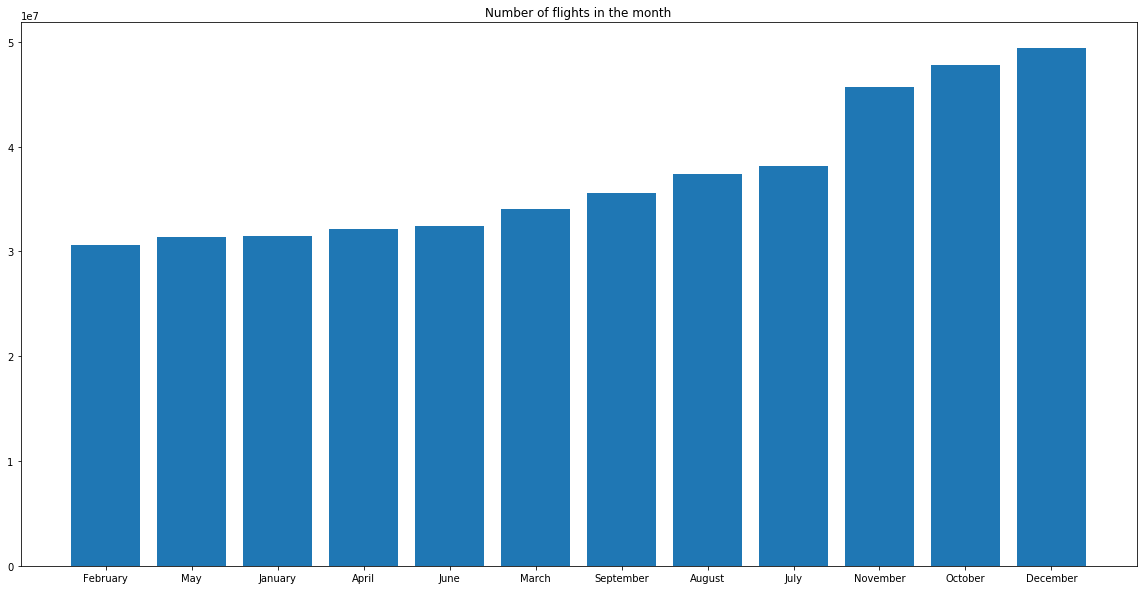

In [137]:
import matplotlib.pyplot as plt

names = list(data_flights.keys())
values = list(data_flights.values())
plt.figure(figsize=(20,10))
plt.bar(names, values)
plt.title('Number of flights in the month');

In [9]:
df_weather['date'] = pd.to_datetime(df_weather['date'])
data_weather_date = dict(df_weather.groupby(df_weather['date'].dt.strftime('%B'))['humidity'].sum().sort_values())
print(data_weather_date)

{'September': 42045.0, 'August': 44218.0, 'June': 45294.0, 'April': 45398.0, 'May': 46527.0, 'February': 47056.0, 'October': 48239.0, 'November': 49087.0, 'July': 49983.0, 'January': 50251.0, 'March': 50318.0, 'December': 56202.0}


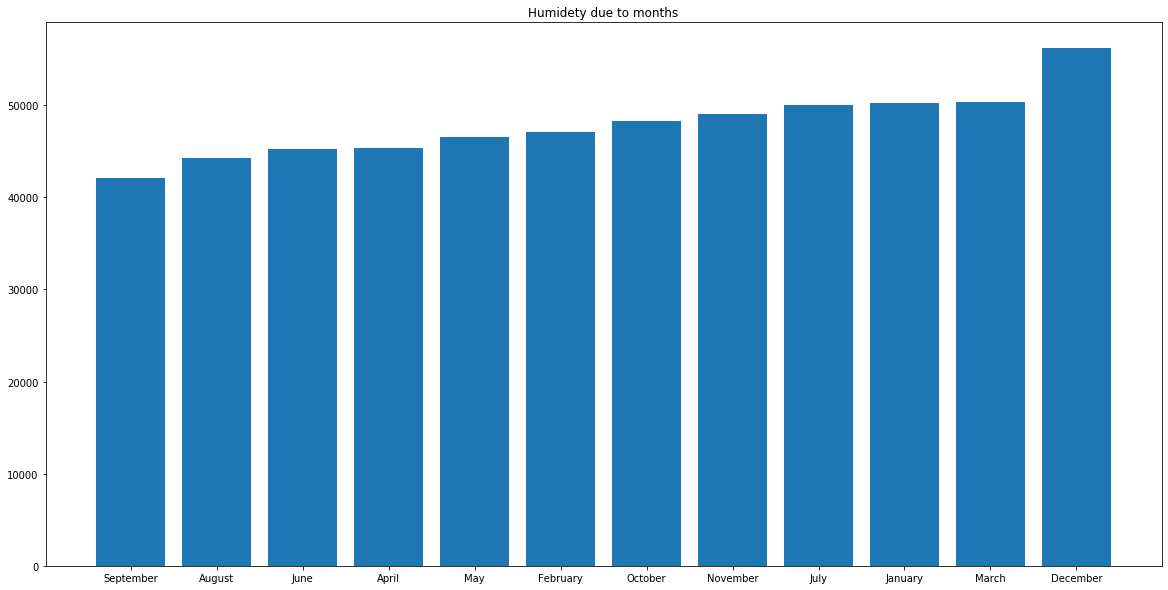

In [10]:
names = list(data_weather_date.keys())
values = list(data_weather_date.values())
plt.figure(figsize=(20,10))
plt.bar(names, values)
plt.title('Humidety due to months');

{'February': 36688.29999999997, 'January': 37923.50000000001, 'December': 39328.799999999974, 'November': 45163.80000000002, 'March': 48634.40000000001, 'October': 52355.900000000045, 'April': 53901.3, 'May': 57554.40000000001, 'September': 58719.89999999994, 'June': 61434.09999999999, 'July': 63759.80000000002, 'August': 66327.10000000005}


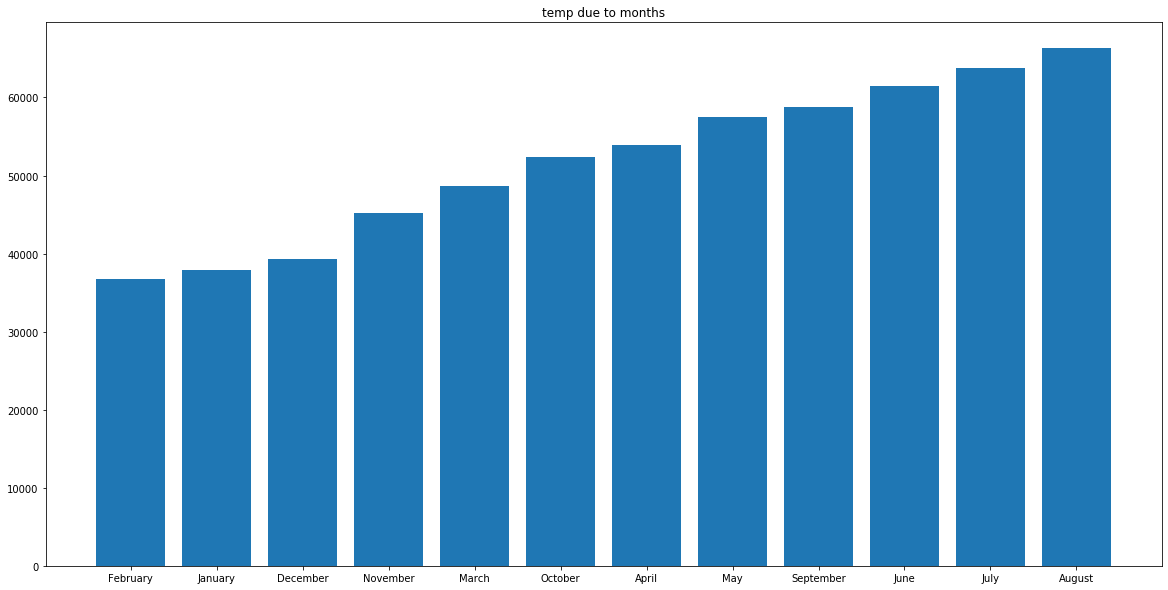

In [13]:
df_weather['date'] = pd.to_datetime(df_weather['date'])
data_weather_date = dict(df_weather.groupby(df_weather['date'].dt.strftime('%B'))['temp'].sum().sort_values())
print(data_weather_date)
names = list(data_weather_date.keys())
values = list(data_weather_date.values())
plt.figure(figsize=(20,10))
plt.bar(names, values)
plt.title('temp due to months');

{'February': 20080.160000000025, 'September': 21463.480000000018, 'April': 21523.21000000004, 'June': 21546.79999999997, 'November': 21546.830000000005, 'December': 21905.67000000001, 'March': 22108.749999999996, 'May': 22161.19000000001, 'August': 22244.590000000007, 'July': 22275.399999999976, 'October': 22318.480000000047, 'January': 22401.299999999956}


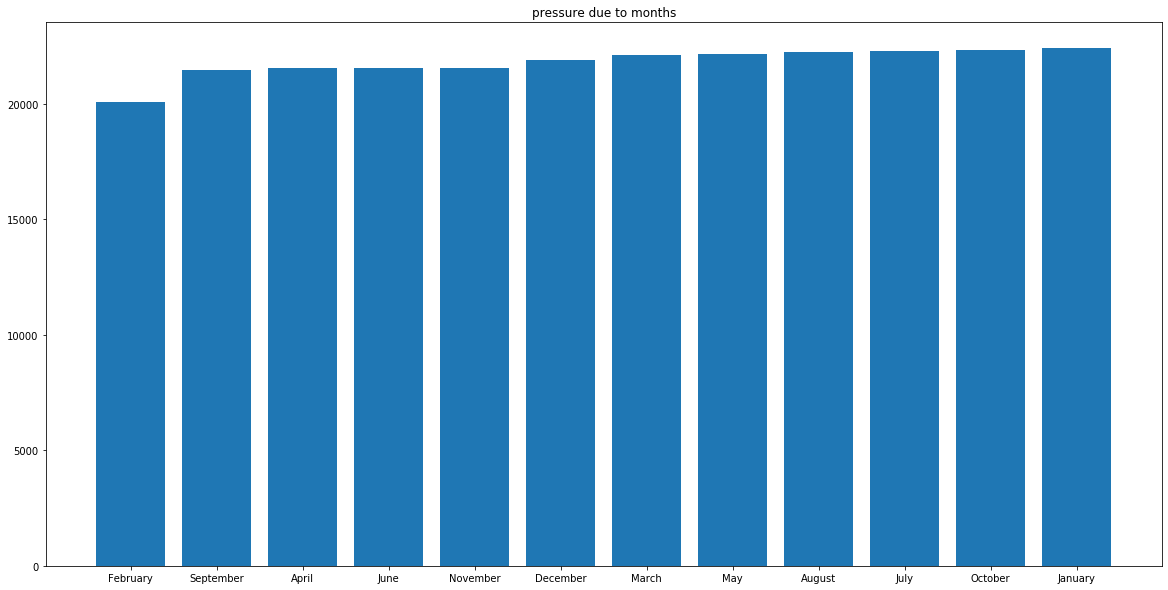

In [14]:
df_weather['date'] = pd.to_datetime(df_weather['date'])
data_weather_date = dict(df_weather.groupby(df_weather['date'].dt.strftime('%B'))['pressure'].sum().sort_values())
print(data_weather_date)
names = list(data_weather_date.keys())
values = list(data_weather_date.values())
plt.figure(figsize=(20,10))
plt.bar(names, values)
plt.title('pressure due to months');

{'July': 4559.100000000002, 'August': 4756.600000000005, 'October': 4808.600000000004, 'September': 5095.900000000003, 'January': 5422.499999999993, 'December': 5861.8, 'June': 5941.900000000006, 'February': 6145.399999999996, 'November': 6257.399999999998, 'March': 6419.700000000002, 'April': 8009.500000000002, 'May': 8470.299999999994}


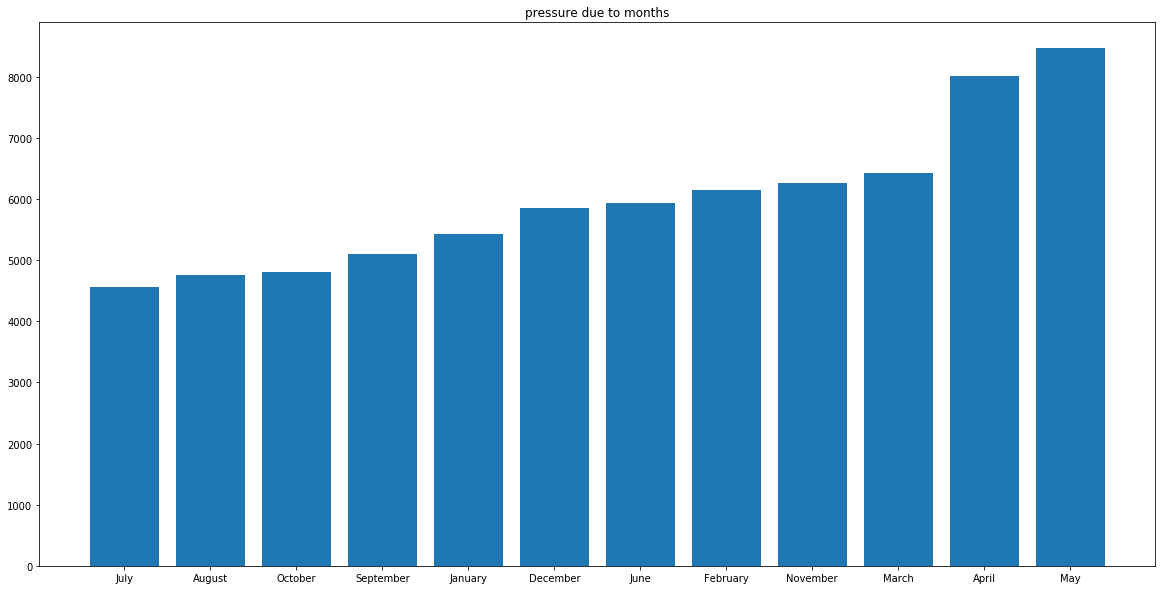

In [15]:
df_weather['date'] = pd.to_datetime(df_weather['date'])
data_weather_date = dict(df_weather.groupby(df_weather['date'].dt.strftime('%B'))['wind_speed'].sum().sort_values())
print(data_weather_date)
names = list(data_weather_date.keys())
values = list(data_weather_date.values())
plt.figure(figsize=(20,10))
plt.bar(names, values)
plt.title('pressure due to months');

In [17]:
df_flights['date'] = pd.to_datetime(df_flights['date'])
data_flights_plane = dict(df_flights.groupby(df_flights['date'].dt.strftime('%B'))['flight'].sum().sort_values())
print(data_flights_plane)

{'February': 30635490, 'May': 31379878, 'January': 31505428, 'April': 32114982, 'June': 32453438, 'March': 34075353, 'September': 35576719, 'August': 37395330, 'July': 38197824, 'November': 45746551, 'October': 47774824, 'December': 49414701}


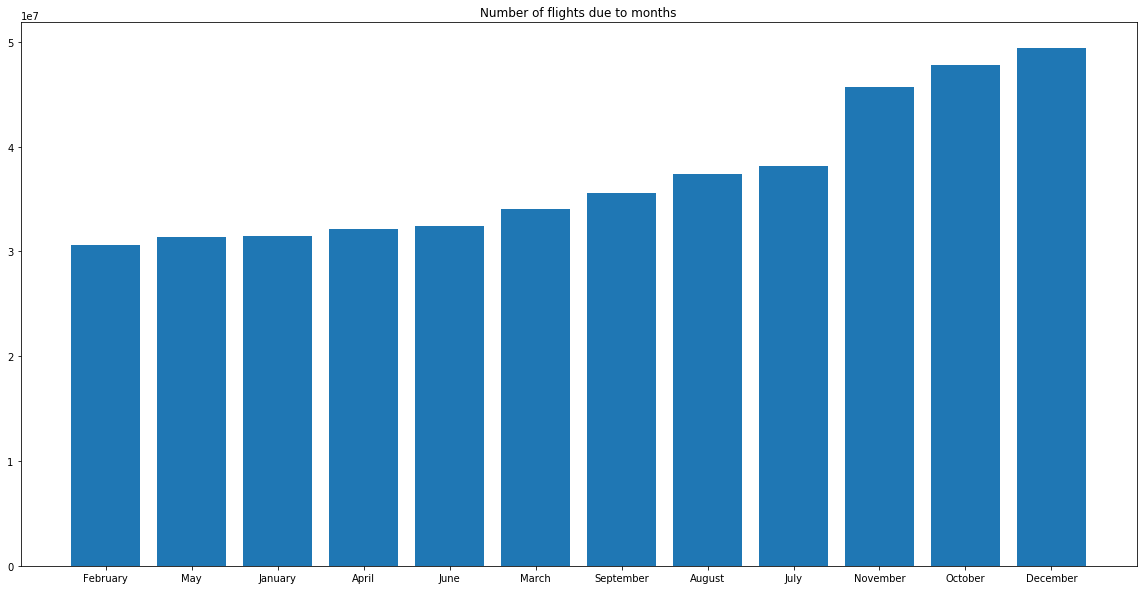

In [18]:
names = list(data_flights_plane.keys())
values = list(data_flights_plane.values())
plt.figure(figsize=(20,10))
plt.bar(names, values)
plt.title('Number of flights due to months');

In [21]:
data_planes = dict(df_planes.groupby(df_planes['plane'])['speed'].sum().sort_values())
print(data_planes)

{'N10156': 0.0, 'N716SW': 0.0, 'N717EV': 0.0, 'N717JL': 0.0, 'N717SA': 0.0, 'N718EV': 0.0, 'N718SK': 0.0, 'N718SW': 0.0, 'N719EV': 0.0, 'N716SK': 0.0, 'N719SK': 0.0, 'N720EV': 0.0, 'N720WN': 0.0, 'N722EV': 0.0, 'N722US': 0.0, 'N723EV': 0.0, 'N723SW': 0.0, 'N72405': 0.0, 'N724EV': 0.0, 'N719SW': 0.0, 'N724SK': 0.0, 'N716EV': 0.0, 'N715SW': 0.0, 'N709JB': 0.0, 'N709SK': 0.0, 'N709SW': 0.0, 'N709UW': 0.0, 'N710DN': 0.0, 'N710EV': 0.0, 'N710SK': 0.0, 'N710SW': 0.0, 'N715UW': 0.0, 'N711HK': 0.0, 'N712SK': 0.0, 'N712SW': 0.0, 'N713EV': 0.0, 'N713SK': 0.0, 'N713SW': 0.0, 'N71411': 0.0, 'N714CB': 0.0, 'N715SK': 0.0, 'N712EV': 0.0, 'N709EV': 0.0, 'N724SW': 0.0, 'N726SK': 0.0, 'N732SK': 0.0, 'N732SW': 0.0, 'N733SA': 0.0, 'N73406': 0.0, 'N73445': 0.0, 'N734SA': 0.0, 'N735SA': 0.0, 'N736SA': 0.0, 'N73299': 0.0, 'N737JW': 0.0, 'N738CB': 0.0, 'N738EV': 0.0, 'N738SK': 0.0, 'N739GB': 0.0, 'N74007': 0.0, 'N740EV': 0.0, 'N740SK': 0.0, 'N740SW': 0.0, 'N73860': 0.0, 'N725SW': 0.0, 'N73291': 0.0, 'N73278':

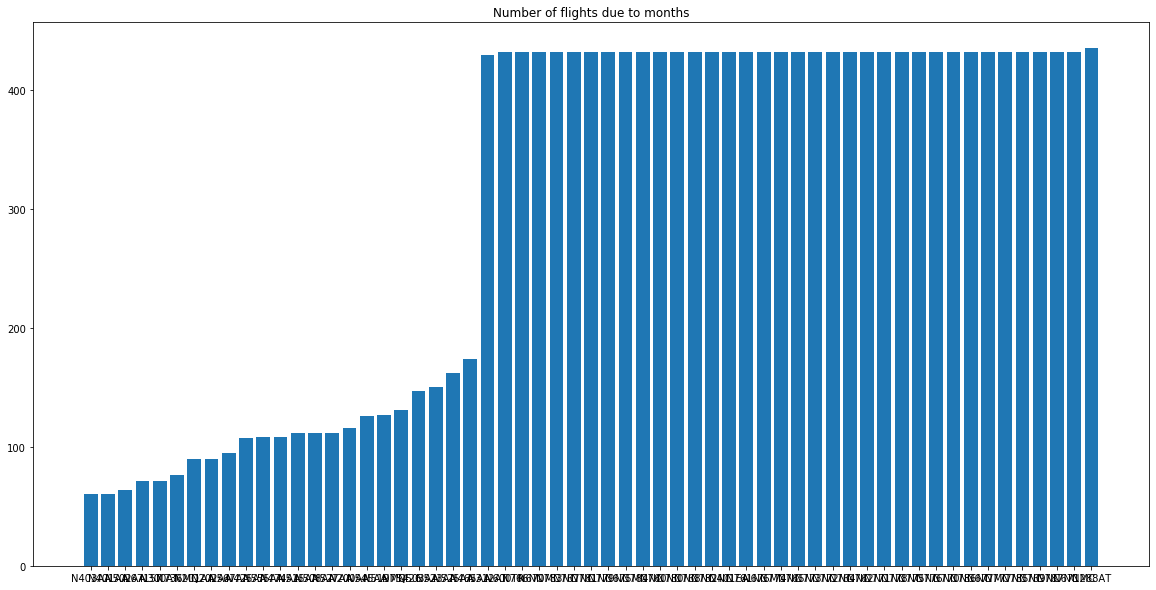

In [24]:
data_planes = dict({x:y for x,y in data_planes.items() if y!=0})

names = list(data_planes.keys())
values = list(data_planes.values())
plt.figure(figsize=(20,10))
plt.bar(names, values)
plt.title('Number of flights due to months');

In [26]:
data_planes = dict({x:y for x,y in data_planes.items() if y!=0})
print(data_planes)

{'N403AA': 60.0, 'N401AA': 60.0, 'N502AA': 64.0, 'N67157': 71.0, 'N300AT': 71.0, 'N736MQ': 76.0, 'N201AA': 90.0, 'N202AA': 90.0, 'N567AA': 95.0, 'N425AA': 107.0, 'N555AA': 108.0, 'N474AA': 108.0, 'N515AA': 112.0, 'N508AA': 112.0, 'N527AA': 112.0, 'N200AA': 116.0, 'N545AA': 126.0, 'N519MQ': 127.0, 'N75426': 131.0, 'N503AA': 147.0, 'N523AA': 150.0, 'N525AA': 162.0, 'N465AA': 174.0, 'N312AT': 429.0, 'N600TR': 432.0, 'N766NC': 432.0, 'N670MC': 432.0, 'N783NC': 432.0, 'N767NC': 432.0, 'N781NC': 432.0, 'N779NC': 432.0, 'N675MC': 432.0, 'N784NC': 432.0, 'N760NC': 432.0, 'N780NC': 432.0, 'N768NC': 432.0, 'N782NC': 432.0, 'N401EA': 432.0, 'N761NC': 432.0, 'N676MC': 432.0, 'N774NC': 432.0, 'N765NC': 432.0, 'N773NC': 432.0, 'N772NC': 432.0, 'N764NC': 432.0, 'N762NC': 432.0, 'N771NC': 432.0, 'N778NC': 432.0, 'N775NC': 432.0, 'N776NC': 432.0, 'N770NC': 432.0, 'N786NC': 432.0, 'N677MC': 432.0, 'N777NC': 432.0, 'N785NC': 432.0, 'N769NC': 432.0, 'N787NC': 432.0, 'N671MC': 432.0, 'N288AT': 435.0}
